# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics


import warnings
warnings.filterwarnings("ignore")

# Load the data

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Checking the BloodPressure data Skew or not

In [4]:
df.BloodPressure.skew()

-1.8436079833551302

**Observation**
- its negative so,its not skewed

### Statistical measure for the BloodPressure column

In [5]:
print("Mean value of BloodPressure:",round(df.BloodPressure.mean(),2))
print("Median value of BloodPressure:",round(df.BloodPressure.median(),2))
print("Minimum value of BloodPressure:",round(df.BloodPressure.min(),2))
print("Maximum value of BloodPressure",round(df.BloodPressure.max(),2))
print("StandardDivation value of BloodPressure:",round(df.BloodPressure.std(),2))

Mean value of BloodPressure: 69.11
Median value of BloodPressure: 72.0
Minimum value of BloodPressure: 0
Maximum value of BloodPressure 122
StandardDivation value of BloodPressure: 19.36


**Observation**
- The minimum value of BloodPressure is Zero that not possible so its outliers

### Calculating the upper and lower limits to detects the outliers in BloodPressure Columns

- Lower Bound: (Q1 - 1.5 * IQR)
- Upper Bound: (Q3 + 1.5 * IQR)
- IQR = Q3 - Q1

In [6]:
Q3=df.BloodPressure.quantile(.75)
Q1=df.BloodPressure.quantile(.25)
IQR=Q3-Q1

In [7]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

In [8]:
print("Lower limit BloodPressure is:",lower_limit)
print("Upper limit BloodPressure is:",upper_limit)

Lower limit BloodPressure is: 35.0
Upper limit BloodPressure is: 107.0


### count the values which are above the upper and below the lower limit

In [9]:
len(df[(df['BloodPressure'] > upper_limit) | (df['BloodPressure'] < lower_limit)])

45

In [10]:
#its a big number if removed it will be bad for model training, so will modify them

#creating another column in the dataframe to load the modified value of bloodpressure and ploting the values, if any problem occured we will
#drop the new column and treat the outliers again by using original columns value

#blood pressure 0 not possible because BloodPressure 0 means the body is dead
#minimum 60-70 can be consideres as normal blood pressure, so replacing it with the mean of blood pressure

In [11]:
bp_mean=df.BloodPressure.mean()
df["BloodPressureModified"]=np.where(
                                df.BloodPressure>upper_limit,bp_mean,
                                np.where(
                                df.BloodPressure<lower_limit,bp_mean,
                                df.BloodPressure))

In [12]:
pd.DataFrame(df.BloodPressureModified.describe().T)

,BloodPressureModified
count,768.000000
mean,72.027013
std,11.170450
min,38.000000
25%,64.000000
50%,72.000000
75%,80.000000
max,106.000000


## Before and After Outliers Detection BloodPressure Column

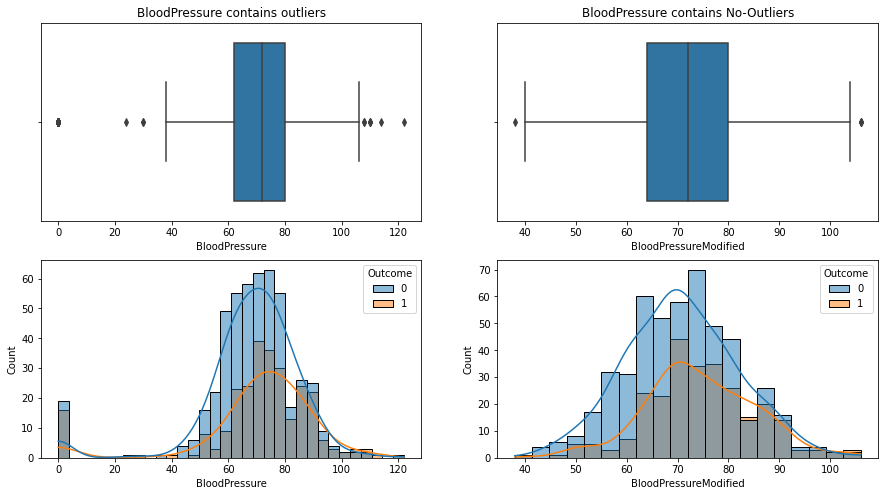

In [62]:
#ploting the bloodpressure modified column to check the outliers
fig = plt.figure(figsize=[15,8])

plt.subplot(2,2,1)
sns.boxplot(x='BloodPressure', data=df)
plt.title("BloodPressure contains outliers")

plt.subplot(2,2,2)
sns.boxplot(x='BloodPressureModified', data=df)
plt.title("BloodPressure contains No-Outliers")


plt.subplot(2,2,3)
sns.histplot(data=df, hue='Outcome', x="BloodPressure",kde=True)



plt.subplot(2,2,4)
sns.histplot(data=df, hue='Outcome', x="BloodPressureModified",kde=True)


plt.show()

## Outliers Detection in SkinThickness using IQR Technique

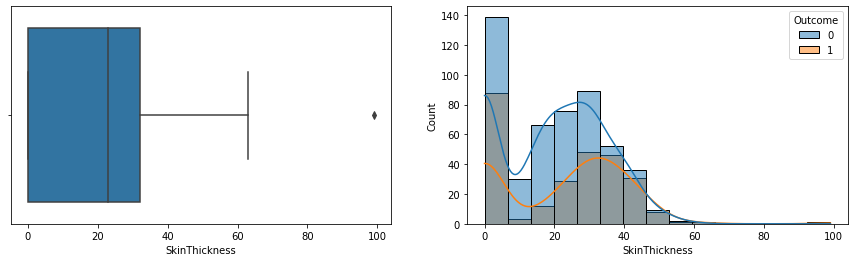

In [24]:
#ploting the SkinThickness modified column to check the outliers
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.boxplot(x='SkinThickness', data=df)

plt.subplot(1,2,2)
sns.histplot(data=df, hue='Outcome', x="SkinThickness",kde=True)

plt.show()

In [25]:
df.SkinThickness.skew()

0.10937249648187608

In [26]:
#we remove the outliers using IQR technique
Q3=df.SkinThickness.quantile(.75)
Q1=df.SkinThickness.quantile(.25)
IQR=Q3-Q1


In [27]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

In [28]:
print("Lower limit is:",lower_limit)
print("Upper limit is:",upper_limit)

Lower limit is: -48.0
Upper limit is: 80.0


In [29]:
df.SkinThickness.describe().T# checking outliers remove or not

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [31]:
df.Insulin.describe().T

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

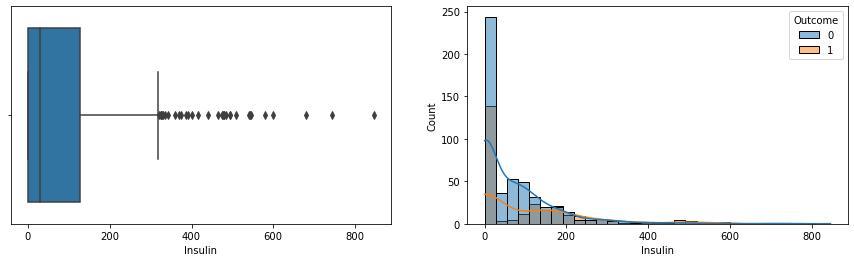

In [32]:
#ploting the Insulin modified column to check the outliers
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.boxplot(x='Insulin', data=df)

plt.subplot(1,2,2)
sns.histplot(data=df, hue='Outcome', x="Insulin",kde=True)

plt.show()

In [33]:
#we remove the outliers using IQR technique
Q3=df.Insulin.quantile(.75)
Q1=df.Insulin.quantile(.25)
IQR=Q3-Q1

In [34]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

In [35]:
print("Lower limit Insulin is:",lower_limit)
print("Upper limit Insulin is:",upper_limit)

Lower limit Insulin is: -190.875
Upper limit Insulin is: 318.125


In [36]:
(df[(df['Insulin'] > upper_limit) | (df['Insulin'] < lower_limit)])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BloodPressureModified
8,2,197,70,45,543,30.5,0.158,53,1,70.0
13,1,189,60,23,846,30.1,0.398,59,1,60.0
54,7,150,66,42,342,34.7,0.718,42,0,66.0
111,8,155,62,26,495,34.0,0.543,46,1,62.0
139,5,105,72,29,325,36.9,0.159,28,0,72.0
153,1,153,82,42,485,40.6,0.687,23,0,82.0
186,8,181,68,36,495,30.1,0.615,60,1,68.0
220,0,177,60,29,478,34.6,1.072,21,1,60.0
228,4,197,70,39,744,36.7,2.329,31,0,70.0
231,6,134,80,37,370,46.2,0.238,46,1,80.0


In [37]:
df[df.Insulin==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BloodPressureModified
0,6,148,72,35,0,33.6,0.627,50,1,72.000000
1,1,85,66,29,0,26.6,0.351,31,0,66.000000
2,8,183,64,0,0,23.3,0.672,32,1,64.000000
5,5,116,74,0,0,25.6,0.201,30,0,74.000000
7,10,115,0,0,0,35.3,0.134,29,0,69.105469
...,...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1,74.000000
762,9,89,62,0,0,22.5,0.142,33,0,62.000000
764,2,122,70,27,0,36.8,0.340,27,0,70.000000
766,1,126,60,0,0,30.1,0.349,47,1,60.000000


In [38]:
df['insulin_modified'] = np.where(df['Insulin']>upper_limit,upper_limit,df['Insulin'])
df['insulin_modified'].describe()

count    768.000000
mean      73.652669
std       93.576029
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      318.125000
Name: insulin_modified, dtype: float64

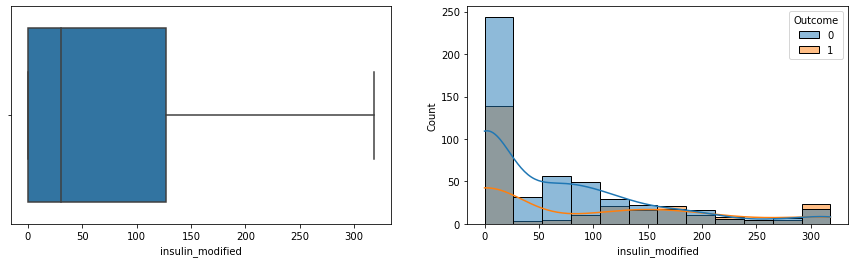

In [39]:
#ploting the visualization of insulin after replacing the outliers
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.boxplot(x='insulin_modified', data=df)

plt.subplot(1,2,2)
sns.histplot(data=df, hue='Outcome', x="insulin_modified",kde=True)

plt.show()

## Before and After Outliers Detection Insulin Column

<AxesSubplot:xlabel='insulin_modified', ylabel='Count'>

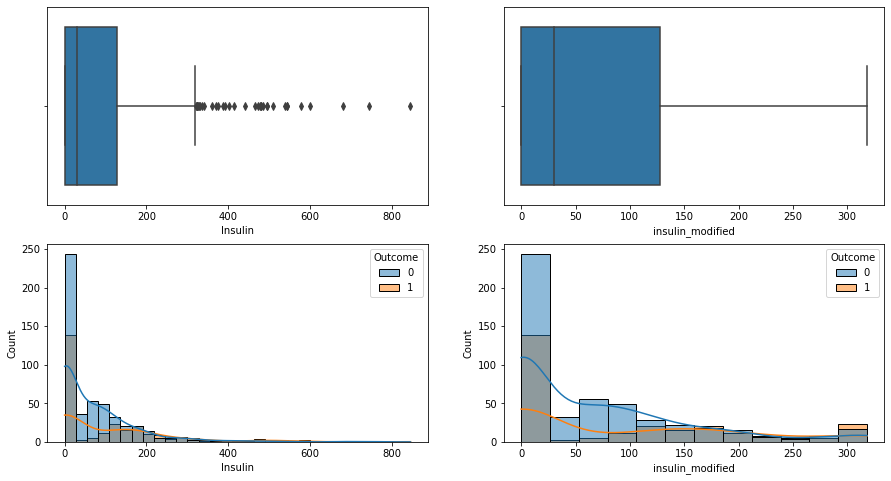

In [61]:
fig = plt.figure(figsize=[15,8])

plt.subplot(2,2,1)
sns.boxplot(x='Insulin', data=df)

plt.subplot(2,2,3)
sns.histplot(data=df, hue='Outcome', x="Insulin",kde=True)

plt.subplot(2,2,2)
sns.boxplot(x='insulin_modified', data=df)

plt.subplot(2,2,4)
sns.histplot(data=df, hue='Outcome', x="insulin_modified",kde=True)

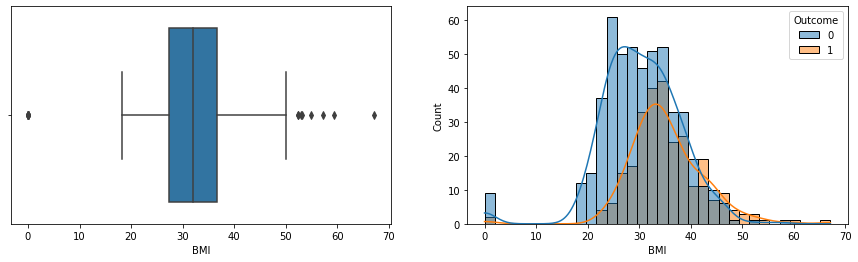

In [49]:
#visulaizing body mass index
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.boxplot(x='BMI', data=df)

plt.subplot(1,2,2)
sns.histplot(data=df, hue='Outcome', x="BMI",kde=True)

plt.show()

In [51]:
Q3=df.BMI.quantile(.75)
Q1=df.BMI.quantile(.25)
IQR=Q3-Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

In [52]:
print("Lower limit BMI is:",lower_limit)
print("Upper limit BMI is:",upper_limit)

Lower limit BMI is: 13.35
Upper limit BMI is: 50.550000000000004


In [53]:
df[df.BMI==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BloodPressureModified,insulin_modified
9,8,125,96,0,0,0.0,0.232,54,1,96.000000,0.0
49,7,105,0,0,0,0.0,0.305,24,0,69.105469,0.0
60,2,84,0,0,0,0.0,0.304,21,0,69.105469,0.0
81,2,74,0,0,0,0.0,0.102,22,0,69.105469,0.0
145,0,102,75,23,0,0.0,0.572,21,0,75.000000,0.0
371,0,118,64,23,89,0.0,1.731,21,0,64.000000,89.0
426,0,94,0,0,0,0.0,0.256,25,0,69.105469,0.0
494,3,80,0,0,0,0.0,0.174,22,0,69.105469,0.0
522,6,114,0,0,0,0.0,0.189,26,0,69.105469,0.0
684,5,136,82,0,0,0.0,0.640,69,0,82.000000,0.0


In [54]:
(df[(df.BMI>upper_limit)|(df.BMI<lower_limit)])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BloodPressureModified,insulin_modified
9,8,125,96,0,0,0.0,0.232,54,1,96.000000,0.000
49,7,105,0,0,0,0.0,0.305,24,0,69.105469,0.000
60,2,84,0,0,0,0.0,0.304,21,0,69.105469,0.000
81,2,74,0,0,0,0.0,0.102,22,0,69.105469,0.000
120,0,162,76,56,100,53.2,0.759,25,1,76.000000,100.000
125,1,88,30,42,99,55.0,0.496,26,1,69.105469,99.000
145,0,102,75,23,0,0.0,0.572,21,0,75.000000,0.000
177,0,129,110,46,130,67.1,0.319,26,1,69.105469,130.000
193,11,135,0,0,0,52.3,0.578,40,1,69.105469,0.000
247,0,165,90,33,680,52.3,0.427,23,0,90.000000,318.125


In [55]:
df["modified_BMI"]=np.where(df.BMI<lower_limit,lower_limit,
                           np.where(df.BMI>upper_limit,upper_limit,df.BMI))

In [56]:
df.modified_BMI.describe().T

count    768.000000
mean      32.125065
std        7.049584
min       13.350000
25%       27.300000
50%       32.000000
75%       36.600000
max       50.550000
Name: modified_BMI, dtype: float64

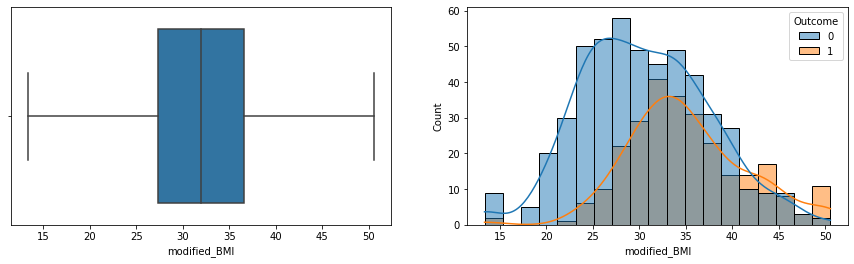

In [57]:
#visulaizing body mass index
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.boxplot(x='modified_BMI', data=df)

plt.subplot(1,2,2)
sns.histplot(data=df, hue='Outcome', x="modified_BMI",kde=True)

plt.show()

## Before and After Outliers Detection BMI Column

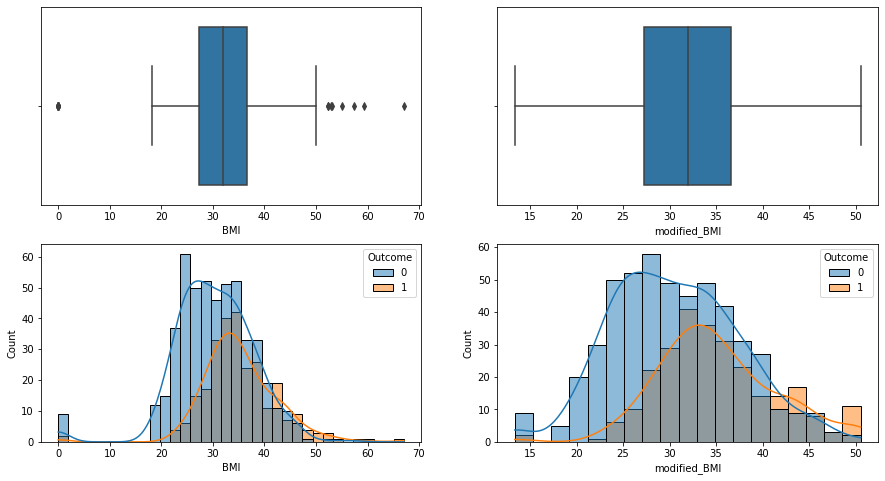

In [60]:
#visulaizing body mass index
fig = plt.figure(figsize=[15,8])

plt.subplot(2,2,1)
sns.boxplot(x='BMI', data=df)

plt.subplot(2,2,2)
sns.boxplot(x='modified_BMI', data=df)

plt.subplot(2,2,3)
sns.histplot(data=df, hue='Outcome', x="BMI",kde=True)

plt.subplot(2,2,4)
sns.histplot(data=df, hue='Outcome', x="modified_BMI",kde=True)
plt.show()

In [ ]:
# diabetes pedigree function determines the risk of type 2 diabetes based on family history, the larger the function, the higher the risk of type 2 diabetes
# so, the column contain the values of risk, so keeping the column as it is

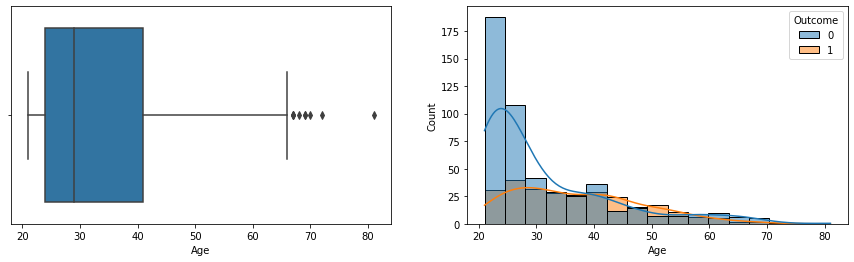

In [63]:
#visulaizing   Age
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.boxplot(x='Age', data=df)

plt.subplot(1,2,2)
sns.histplot(data=df, hue='Outcome', x="Age",kde=True)

plt.show()

In [64]:
Q3=df.Age.quantile(.75)
Q1=df.Age.quantile(.25)
IQR=Q3-Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

In [65]:
print("Lower limit Age is:",lower_limit)
print("Upper limit Age is:",upper_limit)

Lower limit Age is: -1.5
Upper limit Age is: 66.5


In [66]:
df["modified_age"]=np.where(df.Age>upper_limit,upper_limit,df.Age)

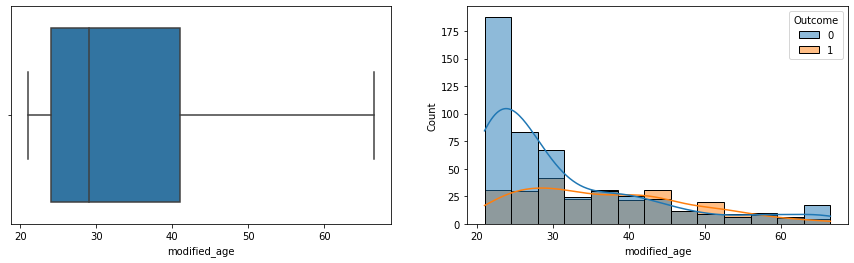

In [67]:
#visulaizing   Age
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.boxplot(x='modified_age', data=df)

plt.subplot(1,2,2)
sns.histplot(data=df, hue='Outcome', x="modified_age",kde=True)

plt.show()

## Before and After Outliers Detection Age Column

<AxesSubplot:xlabel='modified_age', ylabel='Count'>

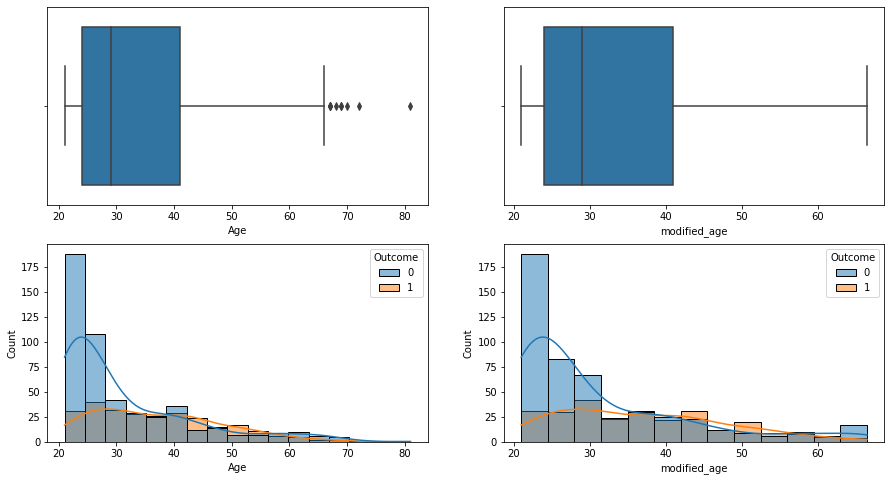

In [69]:
fig = plt.figure(figsize=[15,8])

plt.subplot(2,2,1)
sns.boxplot(x='Age', data=df)



plt.subplot(2,2,2)
sns.boxplot(x='modified_age', data=df)

plt.subplot(2,2,3)
sns.histplot(data=df, hue='Outcome', x="Age",kde=True)


plt.subplot(2,2,4)
sns.histplot(data=df, hue='Outcome', x="modified_age",kde=True)



In [70]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome',
       'BloodPressureModified', 'insulin_modified', 'modified_BMI',
       'modified_age'],
      dtype='object')

## Drop columns 

In [71]:
#droping some old columns which are not needed for the training
df=df.drop(["BloodPressure","Insulin","BMI","Age"],axis=1)

In [72]:
df.head(2)

,Pregnancies,Glucose,SkinThickness,DiabetesPedigreeFunction,Outcome,BloodPressureModified,insulin_modified,modified_BMI,modified_age
0,6,148,35,0.627,1,72.0,0.0,33.6,50.0
1,1,85,29,0.351,0,66.0,0.0,26.6,31.0


In [74]:
x=df.drop(['Outcome'],axis=1)
y=df['Outcome']

## Train test Spliting

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

# LogisticRegression

In [76]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
result_lr=metrics.accuracy_score(y_test, y_pred)
print("LogisticRegression:",round(result_lr*100,3))

LogisticRegression: 77.273


# DecisionTreeClassifier

In [77]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
result_dt=metrics.accuracy_score(y_test, y_pred)
print("DecisionTreeClassifier:",round(result_dt*100,3))

DecisionTreeClassifier: 68.182


# RandomForestClassifier

In [78]:
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
result_rf=metrics.accuracy_score(y_test, y_pred)
print("RandomForestClassifier",round(result_rf*100,3))

RandomForestClassifier 77.273


# Support vector machine


In [79]:
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
result_svc=metrics.accuracy_score(y_test, y_pred)
print("Support vector machine:",round(result_svc*100,3))

Support vector machine: 77.922


In [80]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       100
           1       0.75      0.56      0.64        54

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



In [81]:
metrics.confusion_matrix(y_test, y_pred)

array([[90, 10],
       [24, 30]], dtype=int64)